# Intro

- We'll calculate how much each singular weight and bias changes the loss value, and how to change this weight and bias
- The goal iis to decrease loss, we'll do this by using gradient descent
- Gradient is a result of the calculation of partial derivatives
- we will backpropagate the gradient using the chain rule to update all the weights and biases


In [1]:
import numpy as np
import nnfs
from nnfs.datasets import vertical_data
from NetworkClasses.Loss import *
from NetworkClasses.Layers import *
from NetworkClasses.ActivationFunctions import *

import matplotlib.pyplot as plt

def create_graph(start, end):
    if end < 0:
        end -= 1
    else:
        end += 1
    START = start
    END = end
    TOTAL = np.abs(start) + np.abs(end)
    y_axis = np.zeros(TOTAL)
    x_axis = np.arange(START,END)
    plt.plot(y_axis,x_axis, color="black")
    plt.plot(x_axis,y_axis, color="black")
    plt.legend()
    plt.show()

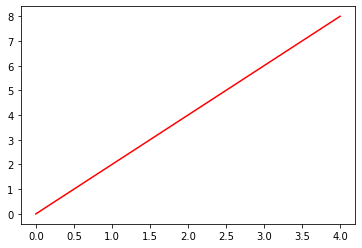

In [2]:
def f(x):
    return 2*x

x = np.array(range(5))
y = f(x)


plt.figure(facecolor='white')
plt.plot(x, y, color="red")
plt.show()

# Slope

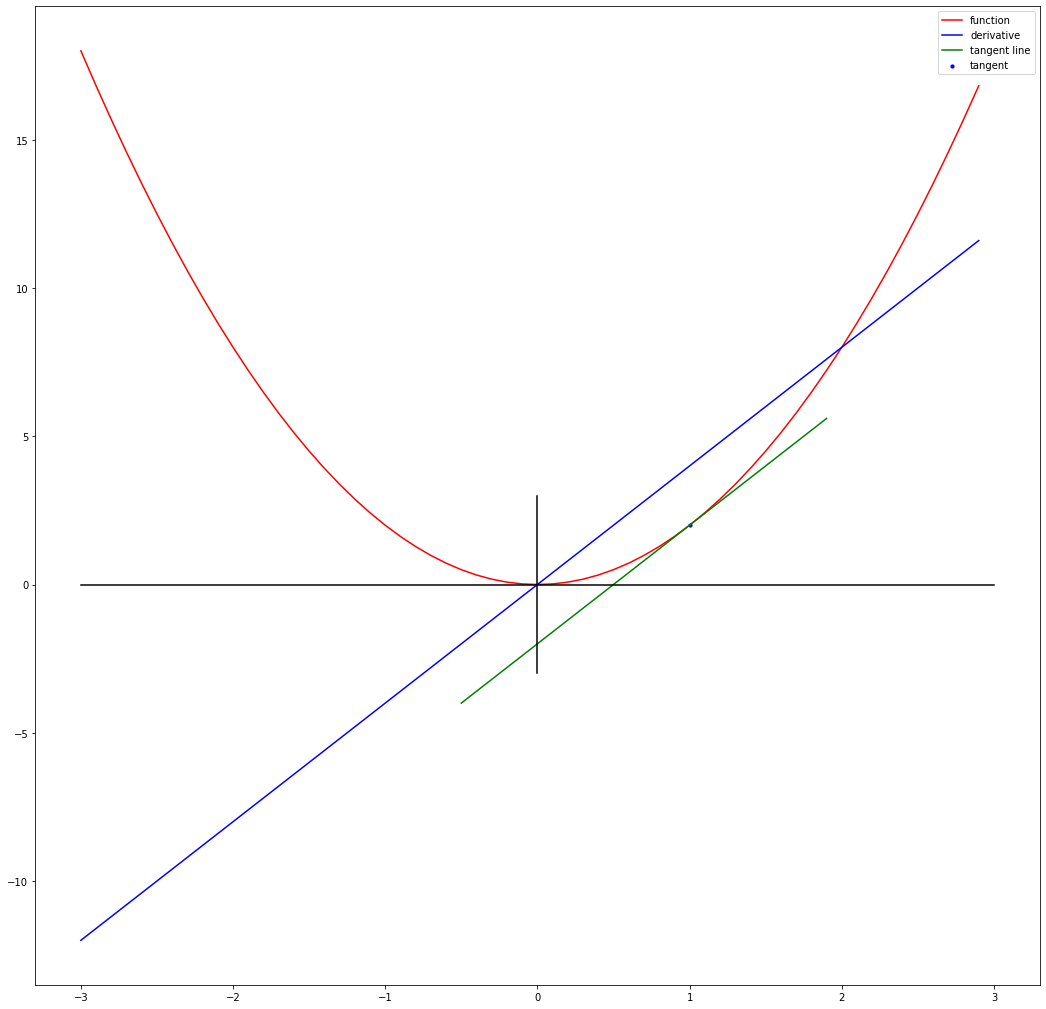

In [3]:
def f(x):
    return 2*x**2
def df(x):
    return 4*x

x = np.arange(-3,3, 0.1)
y = f(x)
dy = df(x)

x_1 = 1
y_1 = f(x_1)
slope = df(x_1)


tangent_line = slope * (x - x_1) + y_1

tangent_line = tangent_line[len(tangent_line)//2-65:len(tangent_line)//2+20]
x_tan = x[len(x)//2-65:len(x)//2+20]

plt.figure(figsize=(18,18), facecolor='white')
plt.plot(x, y, color="red", label="function")
plt.plot(x, dy, color="blue", label="derivative")
plt.plot(x_tan, tangent_line, color="green", label="tangent line")
plt.scatter(x_1,y_1, s=10, color="blue", label="tangent")
create_graph(-3,3)

# Derivative calculated at various points

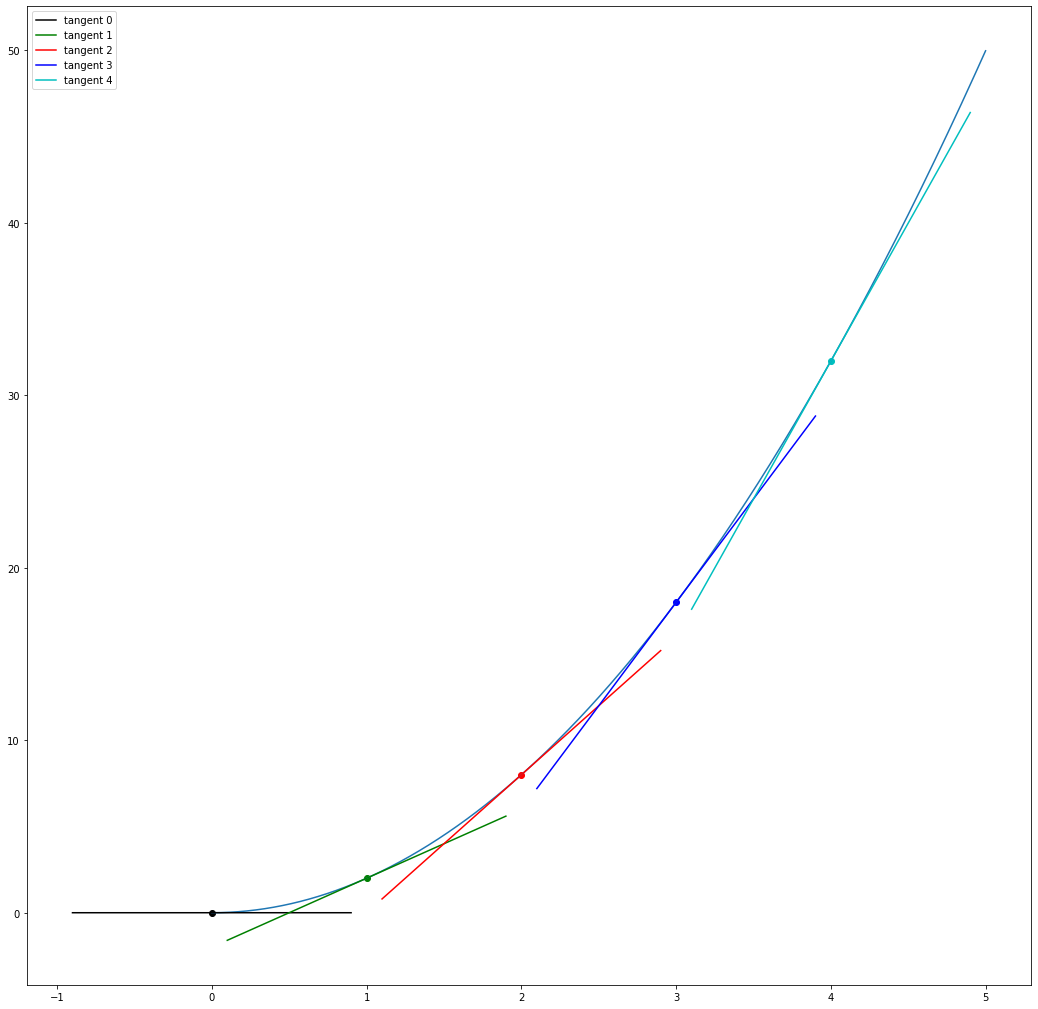

In [6]:
def f(x):
    return 2*x**2

x = np.array(np.arange(0, 5, 0.001))
y = f(x)

plt.figure(figsize=(18,18), facecolor='white')

plt.plot(x, y)

colors = ['k','g','r','b','c']

def approximate_tangent_line(x, approximate_derivative):
    return (approximate_derivative * x) + b

for i in range(5):
    p2_delta = 0.0001

    x1 = i
    x2 = x1 + p2_delta
    y1 = f(x1)
    y2 = f(x2)

    approximate_derivative = (y2-y1)/(x2-x1)
    b = y2-(approximate_derivative*x2)

    to_plot = [x1-0.9, x1, x1+0.9]

    plt.scatter(x1, y1, c=colors[i])

    plt.plot([point for point in to_plot],
             [approximate_tangent_line(point, approximate_derivative) for point in to_plot],
             c=colors[i],
             label=f"tangent {i}")

plt.legend()
plt.show()